# Classification Methods for Breast Cancer Diagnosis

**Project authors:** 
   - Karla Araceli Luque Cobos
   - Maria Beatriz Costa 
   - Ulrike Roesler
<br>

**Advisor:** 
   - Anatol Reibold
<br>

This is the final report for the project "Classification Methods for Breast Cancer Diagnosis". It contains python codes, results, information about the methods and other relevant information for the project. 

**Input dataset:**

    - (Kaggle):  https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/download

The original dataset came from the University of Wisconsin (USA). It was composed of images of cell masses, which were converted with image recognition methods to a numerical matrix. This numerical matrix can be downloaded from Kaggle and is our starting point. The matrix contains several numerical parameters and one categorical parameter, which indicates the cancer diagnosis: either 'M' for malign cancer, or 'B' for benign cancer. The matrix is composed of one header (column names) and 569 patient data (rows).

Hypothesis: we can differentiate between Malign (M) and Bening (B) cancer, based on numerical parameters.

**Methodology:** we used three different machine learning methods for supervised learning for classification and cancer diagnosis. 

We used the following techniques and methods for the project:

    - explorative analysis with basic statistical methods (plots and correlations);
    - logistic regression;
    - random forest;
    - deep learning.

## Importing data from the original CSV file

In [192]:
#loading the required packages 

#Explorative analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon 
import matplotlib.mlab as mlab
import scipy.stats
import seaborn as sns
sns.set()

In [193]:
#Loading the CSV file into a PANDAS object
#PATH for alphatraining PC
df = pd.read_csv("C:/Users/Alfa/Documents/kaggle_breast-cancer-wisconsin.csv")

df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

### Attribute Information (columns):

First two columns:

    - Patient's ID 
    - Diagnosis (M = malignant, B = benign)

Following 30 columns:
Ten numerical features are computed thrice for each cell nucleus:

    - 1.	radius (mean of distances from center to points on the perimeter)
    - 2.	texture (standard deviation of gray-scale values)
    - 3.	perimeter
    - 4.	area
    - 5.	smoothness (local variation in radius lengths)
    - 6.	compactness (perimeter² / area — 1.0)
    - 7.	concavity (severity of concave portions of the contour)
    - 8.	concave points (number of concave portions of the contour)
    - 9.	symmetry
    - 10.	fractal dimension (“coastline approximation” — 1)

The **mean**, **standard error** and **“worst”**, or largest (mean of the three largest values), of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [194]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Explorative analysis

To further explore and understand the data, we used basic statistical methods.

### Diagnosis type histogram and percentage

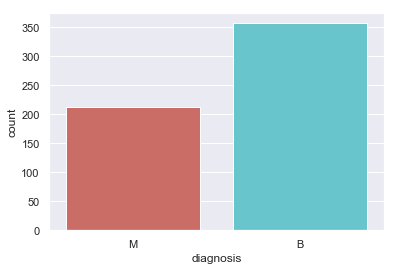

B    357
M    212
Name: diagnosis, dtype: int64

In [195]:
sns.countplot(x='diagnosis',data=df, palette='hls')
plt.show()
df['diagnosis'].value_counts()

In [197]:
count_be = len(df[df['diagnosis']=='B'])
count_ma = len(df[df['diagnosis']=='M'])
pct_be = count_be/(count_be+count_ma)
print("percentage of benign cancer", pct_be*100)
pct_ma = count_ma/(count_be+count_ma)
print("percentage of malign cancer", pct_ma*100)

percentage of benign cancer 62.741652021089635
percentage of malign cancer 37.258347978910365


### Scatter plots grouped by diagnosis - full dataset

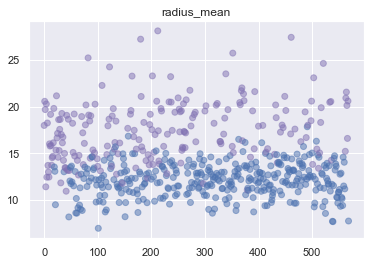

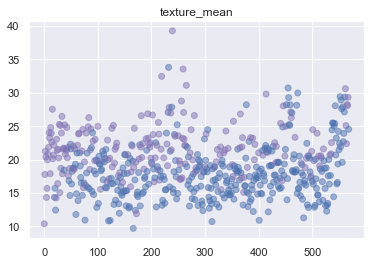

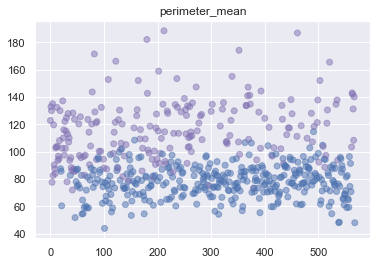

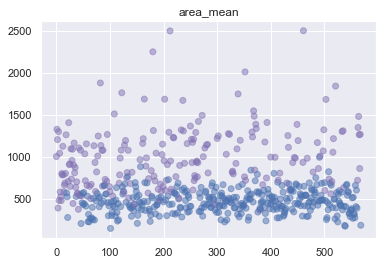

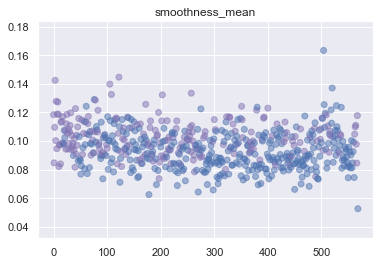

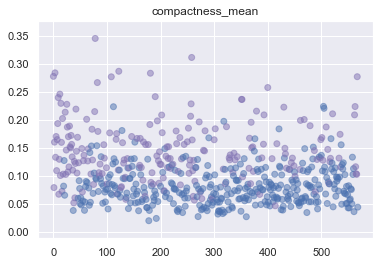

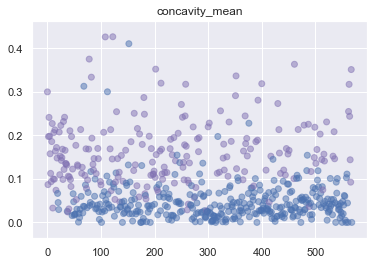

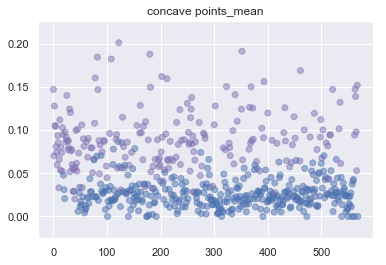

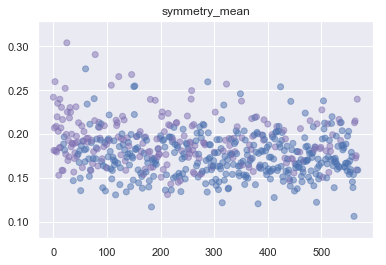

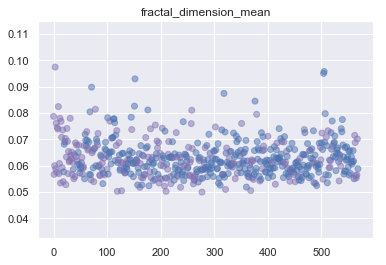

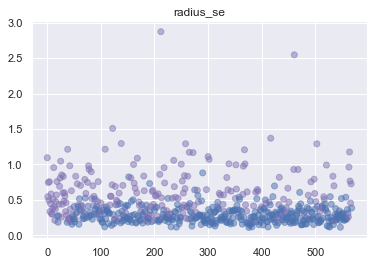

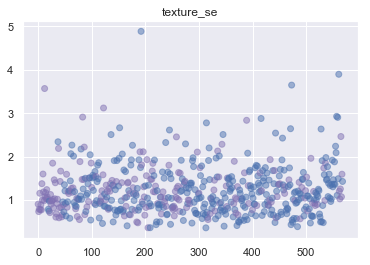

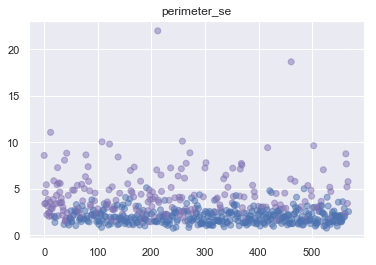

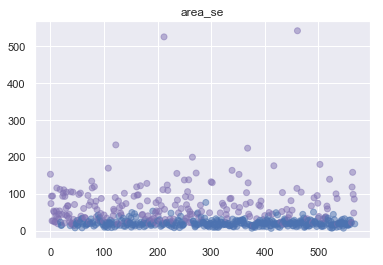

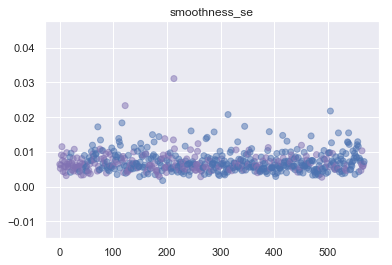

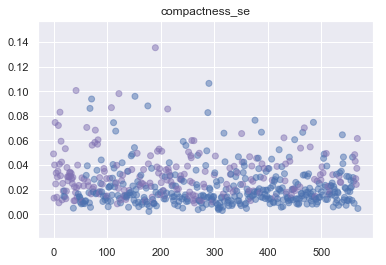

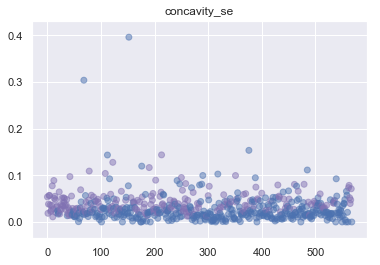

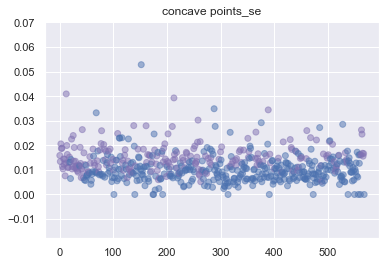

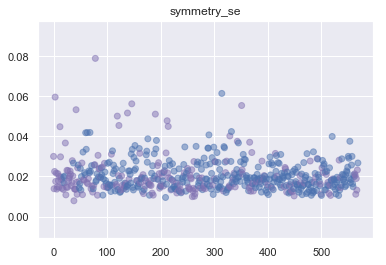

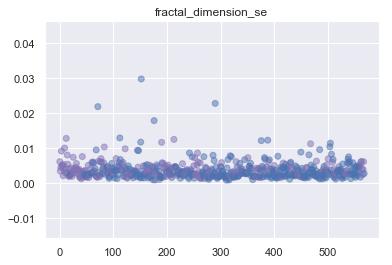

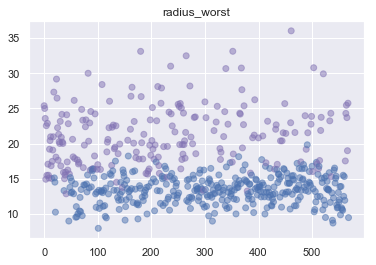

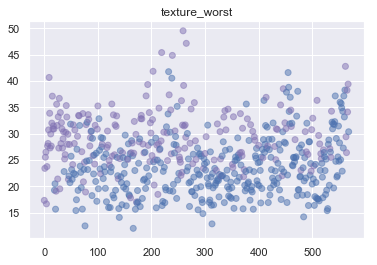

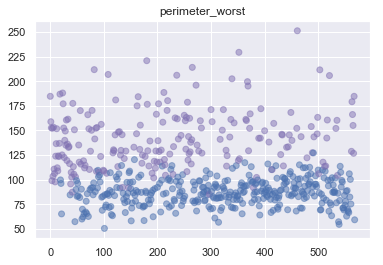

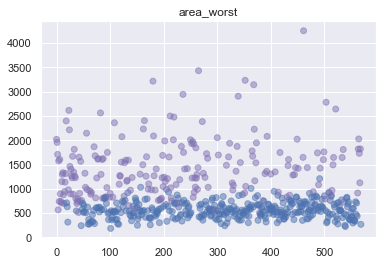

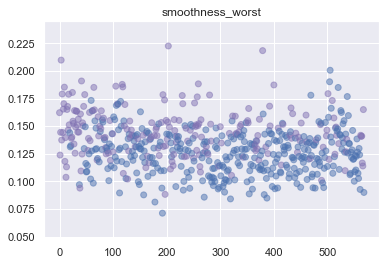

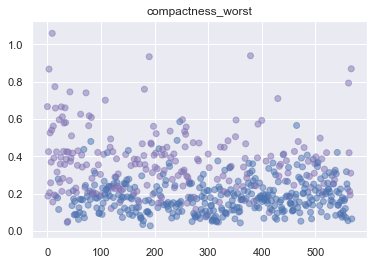

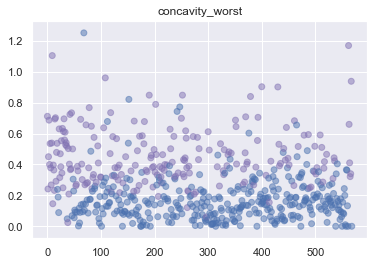

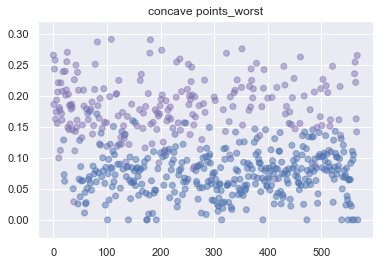

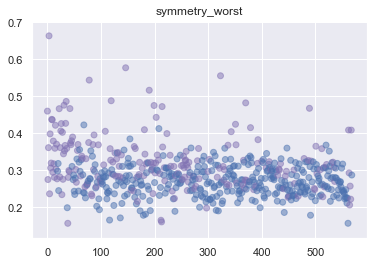

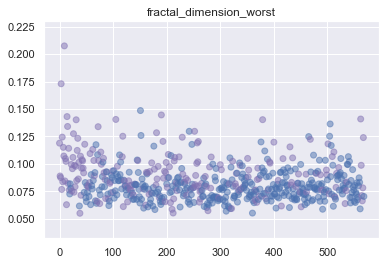

In [199]:
cols_n = list(df.columns)

#Removing the categorical columns
cols_n.remove('id')
cols_n.remove('diagnosis')

#We used a for loop to print all parameters in the form of scatter plots, colored by diagnosis (either 'M' or 'B')

for i in cols_n:
    plt.scatter(x=df.index, y=df[i], c = df.diagnosis, alpha=0.5)
    plt.title(i)
    plt.show()


The table below summarizes the results from above. We analysed each of the figures visually and assigned a profile for each of them based on how well the two clusters (blue and pink) separate: (i) clusters are together; (ii) clusters are somewhat separated and (iii) clusters are separated. 

| Feature       | Cluster separation |
| ------------- |:-------------:|
| radius_mean   | separated |
| perimeter_mean | separated |
| area_mean | separated |
| radius_worst | separated |
| perimeter_worst | separated |
| area_worst | separated |
| texture_mean  | somewhat separated |
| compactness_mean | somewhat separated |
| concavity_mean | somewhat separated |
| concave_points_mean | somewhat separated |
| texture_worst | somewhat separated |
| compactness_worst | somewhat separated |
| concavity_worst | somewhat separated |
| concave points_worst | somewhat separated |
| smoothness_worst | together |
| smoothness_mean | together |
| symmetry_worst | together |
| fractal_dimension_worst | together |

### Scatter plots grouped by diagnosis - normalized dataset

In [201]:
#Here we normalized the object 'df' to 'df_normalized'

#Since we want to preserve the original data, I used the "copy" function to create a new object
df_normalized = df.copy()

#Iterate over the remaining columns to normalize the data and create a z-score column
for col_n in cols_n:
    df_normalized[col_n] = (df_normalized[col_n] - df_normalized[col_n].mean())/df_normalized[col_n].std(ddof=0)

df_normalized.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M     1.097064     -2.073335        1.269934   0.984375   
1    842517         M     1.829821     -0.353632        1.685955   1.908708   
2  84300903         M     1.579888      0.456187        1.566503   1.558884   
3  84348301         M    -0.768909      0.253732       -0.592687  -0.764464   
4  84358402         M     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...      1.886690      -1.359293         2.303601    2.001237   
1  ...      1.805927      -0.369203         1.535126    1.890489   
2  ...      1.511870      -0.023974         1.347475    1.456285   
3  ...     -0.281464       0.133984        -0.249939   -0.550021   
4  ...      1.298575      -1.466770         1.338539    1.220724   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.307686           2.616665         2.109526              2.296076   
1         -0.375612          -0.430444        -0.146749              1.087084   
2          0.527407           1.082932         0.854974              1.955000   
3          3.394275           3.893397         1.989588              2.175786   
4          0.220556          -0.313395         0.613179              0.729259   

   symmetry_worst  fractal_dimension_worst  
0        2.750622                 1.937015  
1       -0.243890                 0.281190  
2        1.152255                 0.201391  
3        6.046041                 4.935010  
4       -0.868353                -0.397100  

[5 rows x 32 columns]

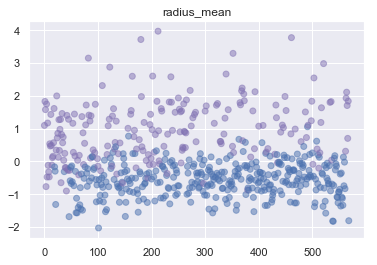

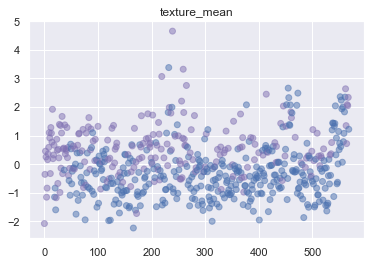

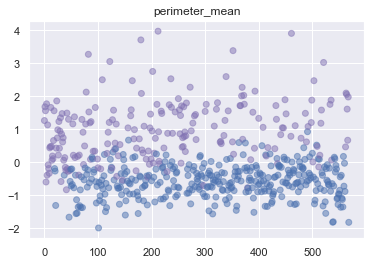

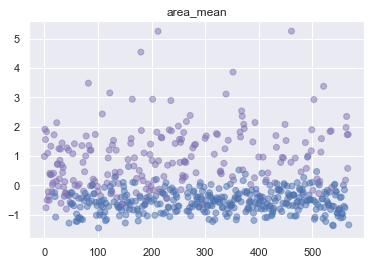

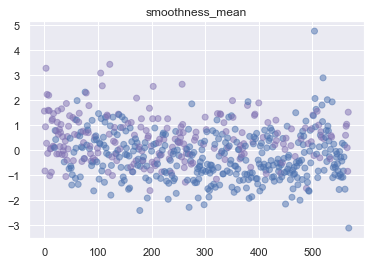

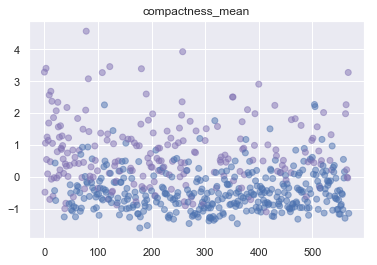

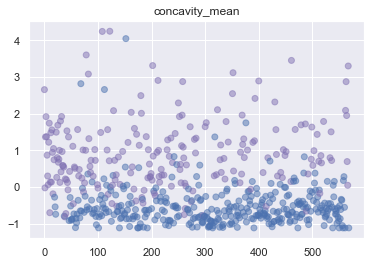

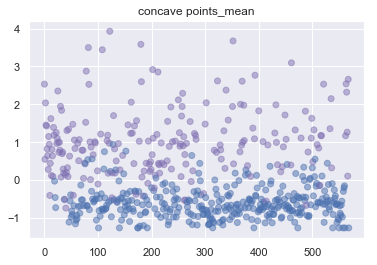

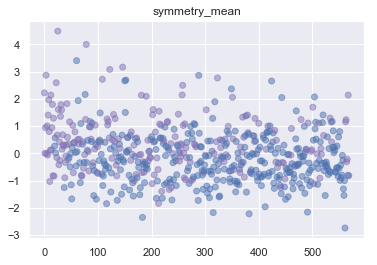

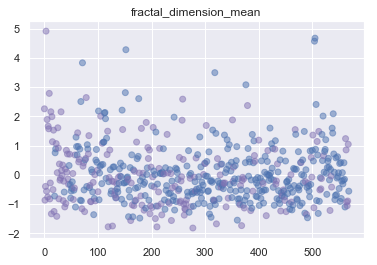

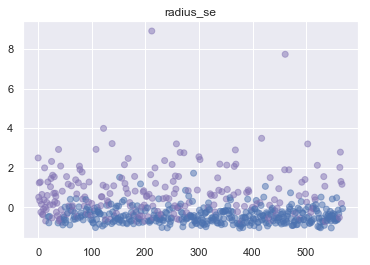

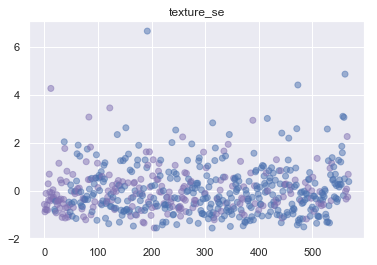

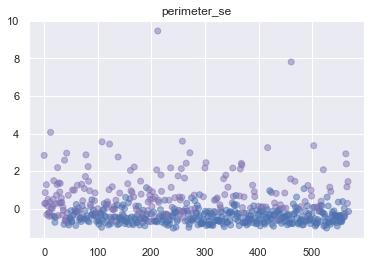

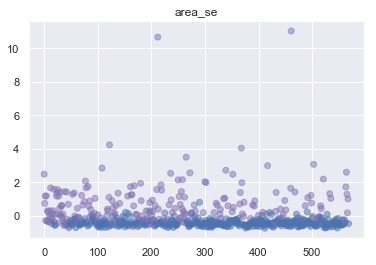

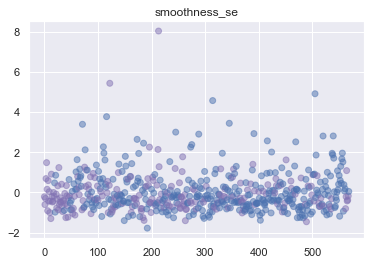

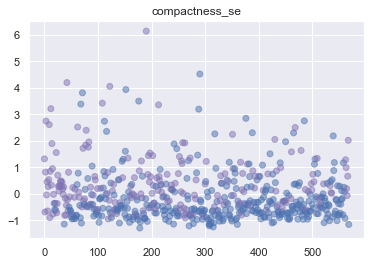

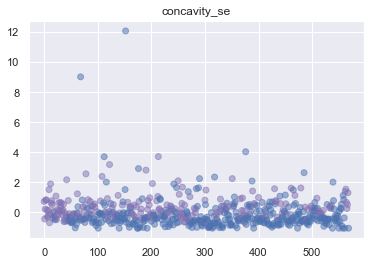

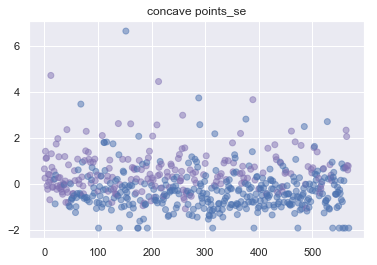

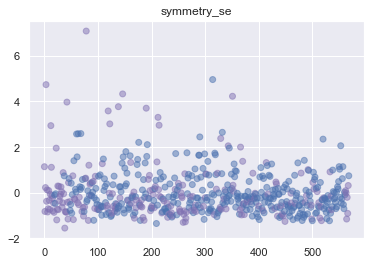

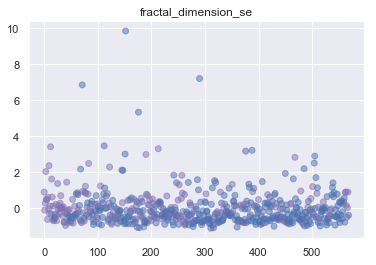

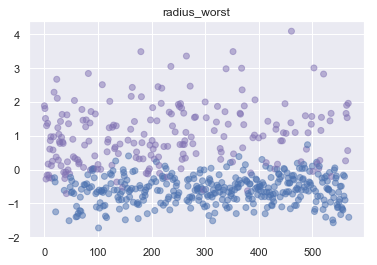

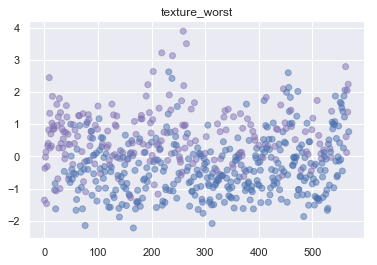

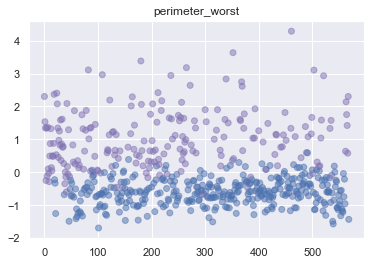

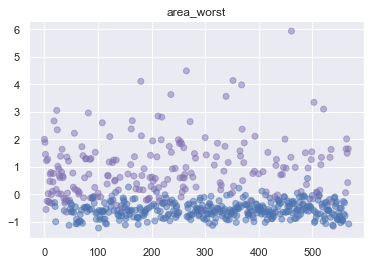

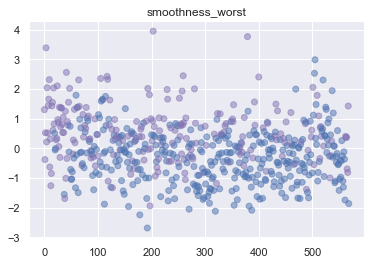

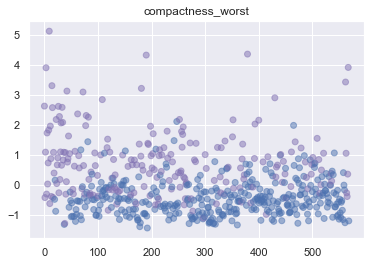

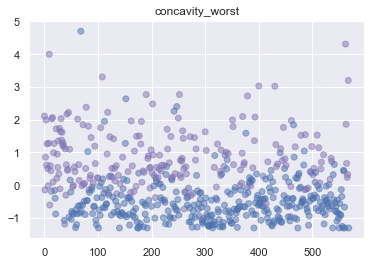

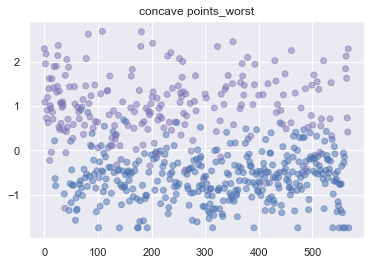

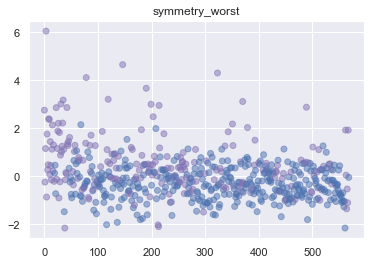

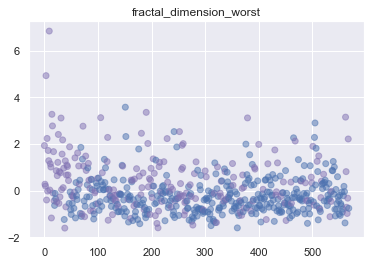

In [202]:
for i in cols_n: 
    plt.scatter(x=df_normalized.index, y=df_normalized[i], c = df_normalized.diagnosis, alpha=0.5)
    plt.title(i)
    plt.show()

### Box plots of all of the 30 parameters

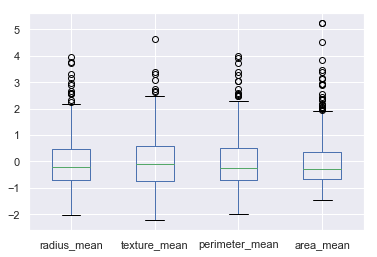

In [203]:
df_normalized.iloc[:,1:6].boxplot()

In [204]:
df.groupby('diagnosis').mean()

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
B                     0.025717       0.174186  ...     13.379801   
M                     0.087990       0.192909  ...     21.134811   

           texture_worst  perimeter_worst   area_worst  smoothness_worst  \
diagnosis                                                                  
B              23.515070        87.005938   558.899440          0.124959   
M              29.318208       141.370330  1422.286321          0.144845   

           compactness_worst  concavity_worst  concave points_worst  \
diagnosis                                                             
B                   0.182673         0.166238              0.074444   
M                   0.374824         0.450606              0.182237   

           symmetry_worst  fractal_dimension_worst  
diagnosis                                           
B                0.270246                 0.079442  
M                0.323468                 0.091530  

[2 rows x 31 columns]

In [205]:
df_normalized.describe()

id   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean   3.037183e+07 -3.162867e-15 -6.530609e-15   -7.078891e-16 -8.799835e-16   
std    1.250206e+08  1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min    8.670000e+03 -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%    8.692180e+05 -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%    9.060240e+05 -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    8.813129e+06  4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    9.113205e+08  3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      6.056471e-15     -1.146905e-15   -4.421380e-16         1.017347e-15   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count   5.690000e+02  ...  5.690000e+02   5.690000e+02     5.690000e+02   
mean   -1.965426e-15  ... -2.333224e-15   1.763674e-15    -1.198026e-15   
std     1.000880e+00  ...  1.000880e+00   1.000880e+00     1.000880e+00   
min    -2.744117e+00  ... -1.726901e+00  -2.223994e+00    -1.693361e+00   
25%    -7.032397e-01  ... -6.749213e-01  -7.486293e-01    -6.895783e-01   
50%    -7.162650e-02  ... -2.690395e-01  -4.351564e-02    -2.859802e-01   
75%     5.307792e-01  ...  5.220158e-01   6.583411e-01     5.402790e-01   
max     4.484751e+00  ...  4.094189e+00   3.885905e+00     4.287337e+00   

         area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  5.690000e+02      5.690000e+02       5.690000e+02     5.690000e+02   
mean   5.049661e-16     -5.225658e-15      -2.174788e-15     6.856456e-16   
std    1.000880e+00      1.000880e+00       1.000880e+00     1.000880e+00   
min   -1.222423e+00     -2.682695e+00      -1.443878e+00    -1.305831e+00   
25%   -6.421359e-01     -6.912304e-01      -6.810833e-01    -7.565142e-01   
50%   -3.411812e-01     -4.684277e-02      -2.695009e-01    -2.182321e-01   
75%    3.575891e-01      5.975448e-01       5.396688e-01     5.311411e-01   
max    5.930172e+00      3.955374e+00       5.112877e+00     4.700669e+00   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count          5.690000e+02    5.690000e+02             5.690000e+02  
mean          -1.475094e-16   -2.288786e-15             2.531465e-15  
std            1.000880e+00    1.000880e+00             1.000880e+00  
min           -1.745063e+00   -2.160960e+00            -1.601839e+00  
25%           -7.563999e-01   -6.418637e-01            -6.919118e-01  
50%           -2.234689e-01   -1.274095e-01            -2.164441e-01  
75%            7.125100e-01    4.501382e-01             4.507624e-01  
max            2.685877e+00    6.046041e+00             6.846856e+00  

[8 rows x 31 columns]

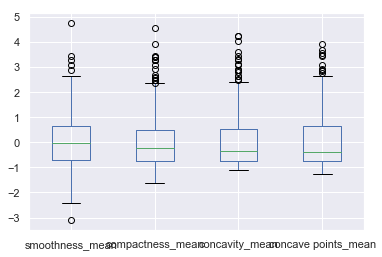

In [206]:
df_normalized.iloc[:,6:10].boxplot()

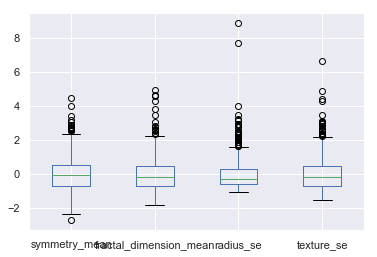

In [207]:
df_normalized.iloc[:,10:14].boxplot()

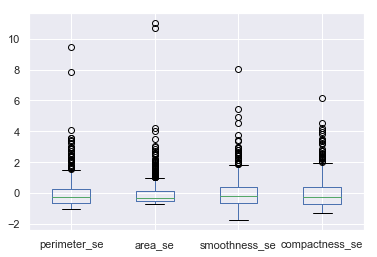

In [208]:
df_normalized.iloc[:,14:18].boxplot()

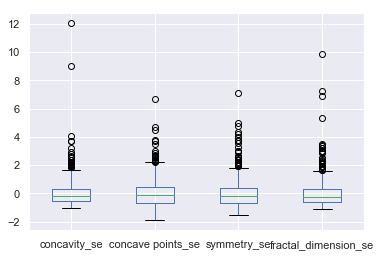

In [209]:
df_normalized.iloc[:,18:22].boxplot()

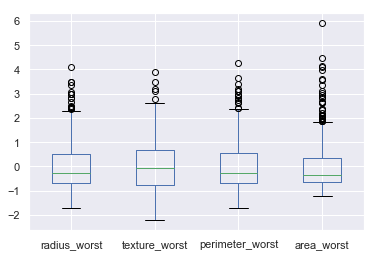

In [210]:
df_normalized.iloc[:,22:26].boxplot()

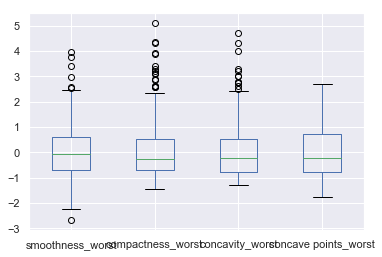

In [211]:
df_normalized.iloc[:,26:30].boxplot()

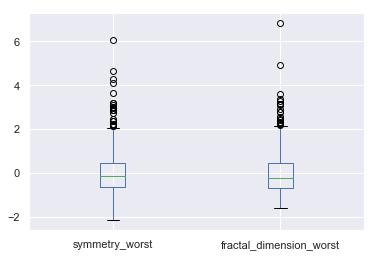

In [212]:
df_normalized.iloc[:,30:32].boxplot()

### Correlation matrix

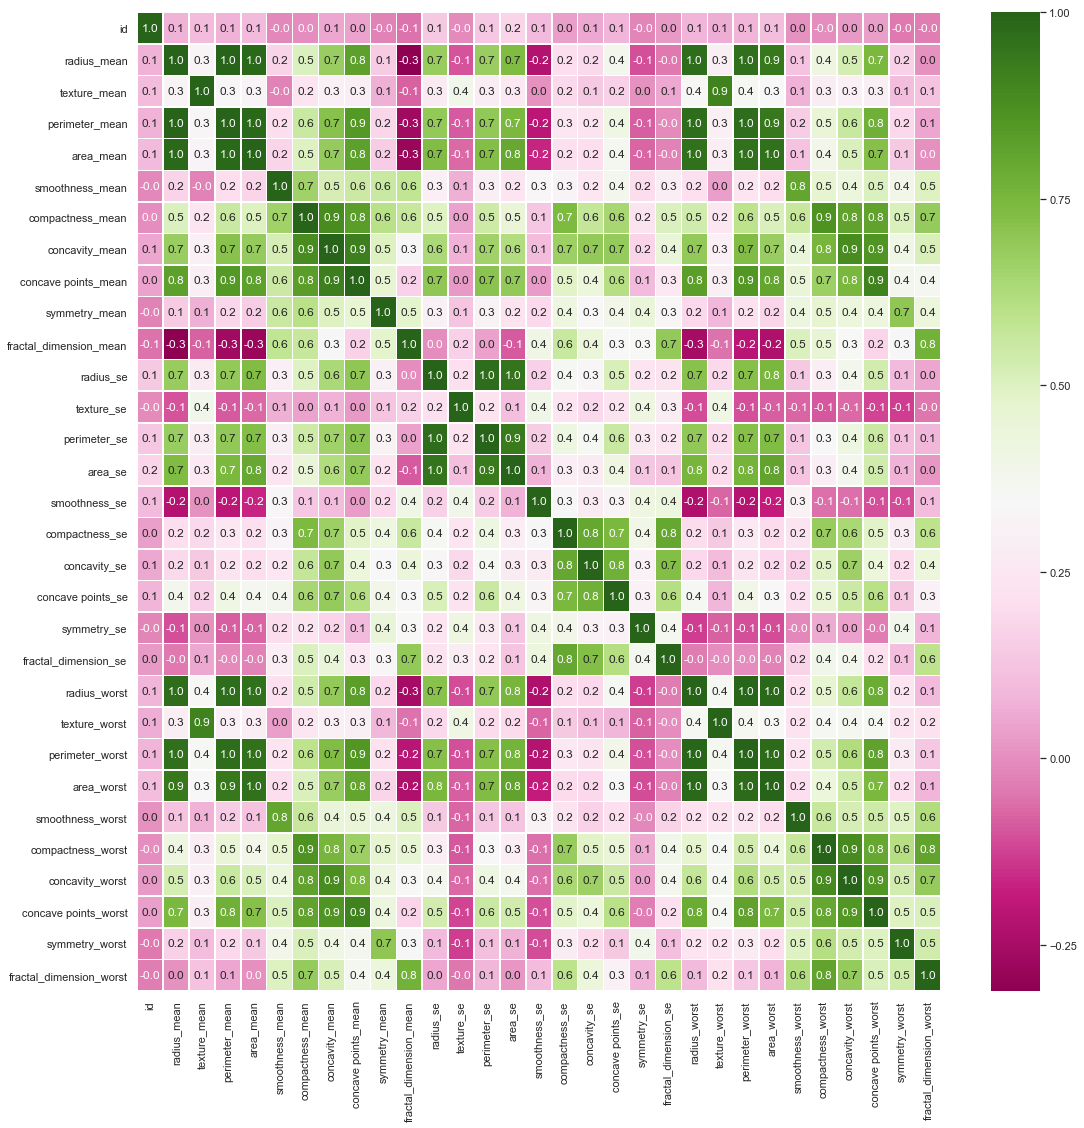

In [213]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="PiYG" ,fmt= '.1f',ax=ax)

In [214]:
df_reduced = df.copy()

df_reduced.columns = df_reduced.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

cols_reduced = ['radius_worst', 
                'texture_worst', 
                'perimeter_worst', 
                'area_worst', 
                'smoothness_worst', 
                'compactness_worst', 
                'concavity_worst',
                'concave_points_worst', 
                'symmetry_worst', 
                'fractal_dimension_worst']

df_reduced = df_reduced.drop(cols_reduced, axis=1)

cols_reduced2 = ['perimeter_mean',
                'perimeter_se', 
                'area_mean', 
                'area_se']

df_reduced = df_reduced.drop(cols_reduced2, axis=1)

cols_reduced3 = ['concavity_mean',
                 'concavity_se', 
                 'concave_points_mean', 
                 'concave_points_se']

df_reduced = df_reduced.drop(cols_reduced3, axis=1)

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

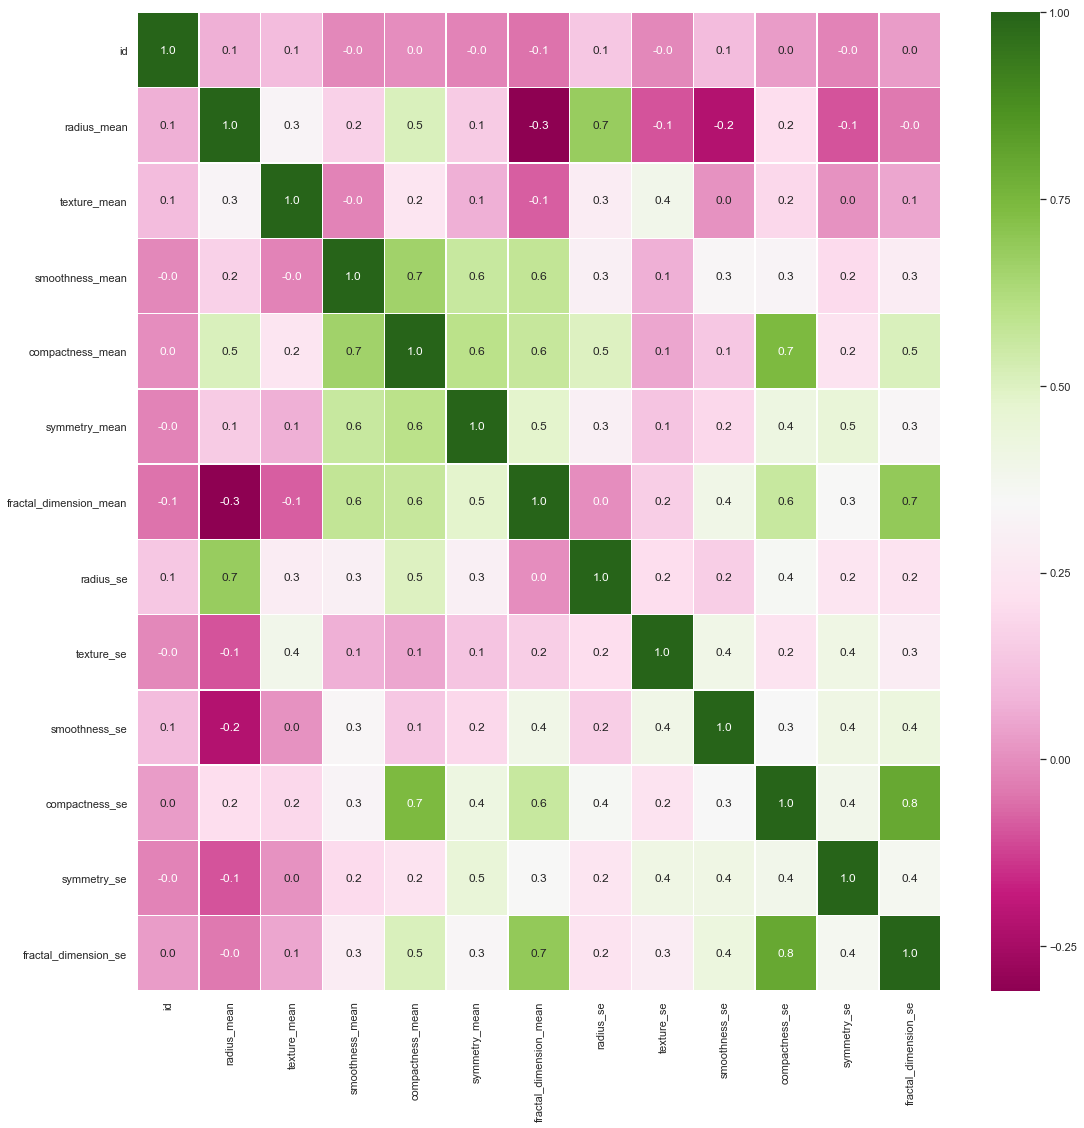

In [215]:
#New correlation matrix
corr = df_reduced.corr().round(2)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_reduced.corr().round(2), annot=True, linewidths=.5,cmap="PiYG", fmt= '.1f', ax=ax)
plt.show()

### Discussion

We can see from the explorative analysis that some parameters seem to correlate a lot with others, indicating a colinearity issue. 

We will follow with two experimentos of the logistic regression:

    - All 30 parameters, full dataset;
    - Reduced dataset.
    
We can afterwards compare both results and see if the reduced parameters make for better a model than the full set.

## Logistic regression

In [217]:
#Loading libraries

#Logistic regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
%matplotlib inline

### Full dataset

In [218]:
#Aufteilung des Datensatzes in Merkmale und Zielvariable. 
y = df.iloc[:,1]
X = df.iloc[:, 2:]

In [219]:
X.shape
y.shape
#Teilen des Datensatzes mit der Funktion train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


### Normalisation after the split between train and test sets

For many classification problems, the dimension is an important issue. This is relevant for our project. Our data has the parameters with different unities (dimensions). We cannot apply a machine learning method, such as neural networks, directly on such data, since the different dimensions will be summed up.

We have in addition to that the problem that the greatness of numbers change greatly from column to column, which is a also problem for many methods that compare them directly. 

In summary, without normalization, one cannot compare the parameters directly.

There is a simple solution that solves both problems, which is normalization: numeric transformation to Z-score. For that we can apply this simple mathematical formula to all columns:

    X_new(w) = (X(w) - mittelwert(X in der Probe)) / (standardabweichung von X in der Probe)
    
In python code:
    
    df_normalized=(df-df.mean())/df.std()

In [220]:
#Anwendung der Standardskalierung zur Optimierung des Ergebnisses
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Instanziierung des Modells (mit den Standardparametern)
alg = LogisticRegression(solver = 'lbfgs')

#das Modell mit Daten füllen
alg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
#eine Vorhersage wird gemacht
y_pred = alg.predict(X_test)
print(y_test[0:5])

512    M
457    B
439    B
298    B
37     B
Name: diagnosis, dtype: object


[[65  2]
 [ 2 45]]


Text(0.5, 1.1, 'Confusionmatrix')

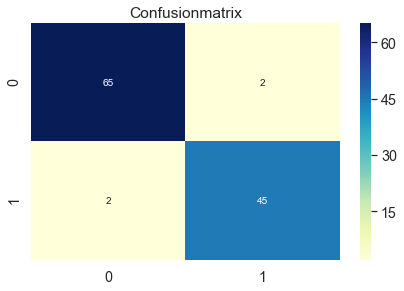

In [222]:
#Confusionmatrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

class_names=[0,1] # Klassenamen
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Heatmap Visualisierung
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusionmatrix', y=1.1)

In [223]:
#Genauigkeit 

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9649122807017544


### Reduced dataset

In [224]:
#Aufteilung des Datensatzes in Merkmale und Zielvariable. 
y = df_reduced.iloc[:,1]
X = df_reduced.iloc[:, 2:]

In [225]:
X.shape

(569, 12)

In [226]:
y.shape 

(569,)

In [227]:
#Teilen des Datensatzes mit der Funktion train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [228]:
print(X_train.shape)
print(X_test.shape)

(455, 12)
(114, 12)


In [229]:
#Anwendung der Standardskalierung zur Optimierung des Ergebnisses
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [230]:
#Instanziierung des Modells (mit den Standardparametern)
alg = LogisticRegression(solver = 'lbfgs')

In [231]:
#das Modell mit Daten füllen
alg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
#eine Vorhersage wird gemacht
y_pred = alg.predict(X_test)

In [233]:
print(y_pred[0:5])

['M' 'B' 'B' 'B' 'B']


In [234]:
print(y_test[0:5])

512    M
457    B
439    B
298    B
37     B
Name: diagnosis, dtype: object


[[59  8]
 [ 4 43]]


Text(0.5, 1.1, 'Confusionmatrix')

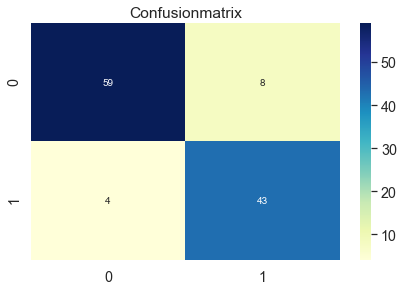

In [235]:
#Confusionmatrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

class_names=[0,1] # Klassenamen
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap Visualisierung
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusionmatrix', y=1.1)

In [236]:
#Genauigkeit 
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8947368421052632


### Discussion

We can see from the results that the fullset creates a better model than the reduced set, since the accuracy was better by the fullset experiment.

## Random Forest

A random forest classifier. "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

A short introduction how the Random Forest Algorithm Works

basic steps of the random forest algorithm:

    Pick N random records from the dataset.
    Build a decision tree based on these N records.
    Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
    In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.



In [238]:
df_red = df.iloc[:,2:]
df_red.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [239]:
from sklearn import preprocessing# Get column names first
names = df_red.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [240]:
#Splitting for classification
y = df_normalized['diagnosis']
X = df_normalized.drop(columns = ['diagnosis', 'id'])

In [241]:
#Convert categorical variable to 0/1-coding
y = (y == 'B')

In [242]:
pd.get_dummies(df.diagnosis, drop_first = False).head(20) #Funktion zur Konvertierung

B  M
0   0  1
1   0  1
2   0  1
3   0  1
4   0  1
5   0  1
6   0  1
7   0  1
8   0  1
9   0  1
10  0  1
11  0  1
12  0  1
13  0  1
14  0  1
15  0  1
16  0  1
17  0  1
18  0  1
19  1  0

In [243]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [244]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: diagnosis, dtype: bool

In [245]:
#Splitting in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [246]:
#Classification via RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [247]:
#Accuracy 
sum((y_test == y_pred)) / len(y_test)

0.9649122807017544

In [248]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)


0.9649122807017544

In [249]:
metrics.f1_score(y_test,y_pred)

0.9696969696969696

In [250]:
metrics.confusion_matrix(y_test, y_pred)

array([[46,  1],
       [ 3, 64]], dtype=int64)

In [251]:
y_pred[:10]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Plot of one Decisiontree

In [252]:
feature_names_df=list(df_normalized.columns) # definition of the feature_names for the plots
feature_names_df.remove('id')
feature_names_df.remove('diagnosis')
#print(feature_names_df)

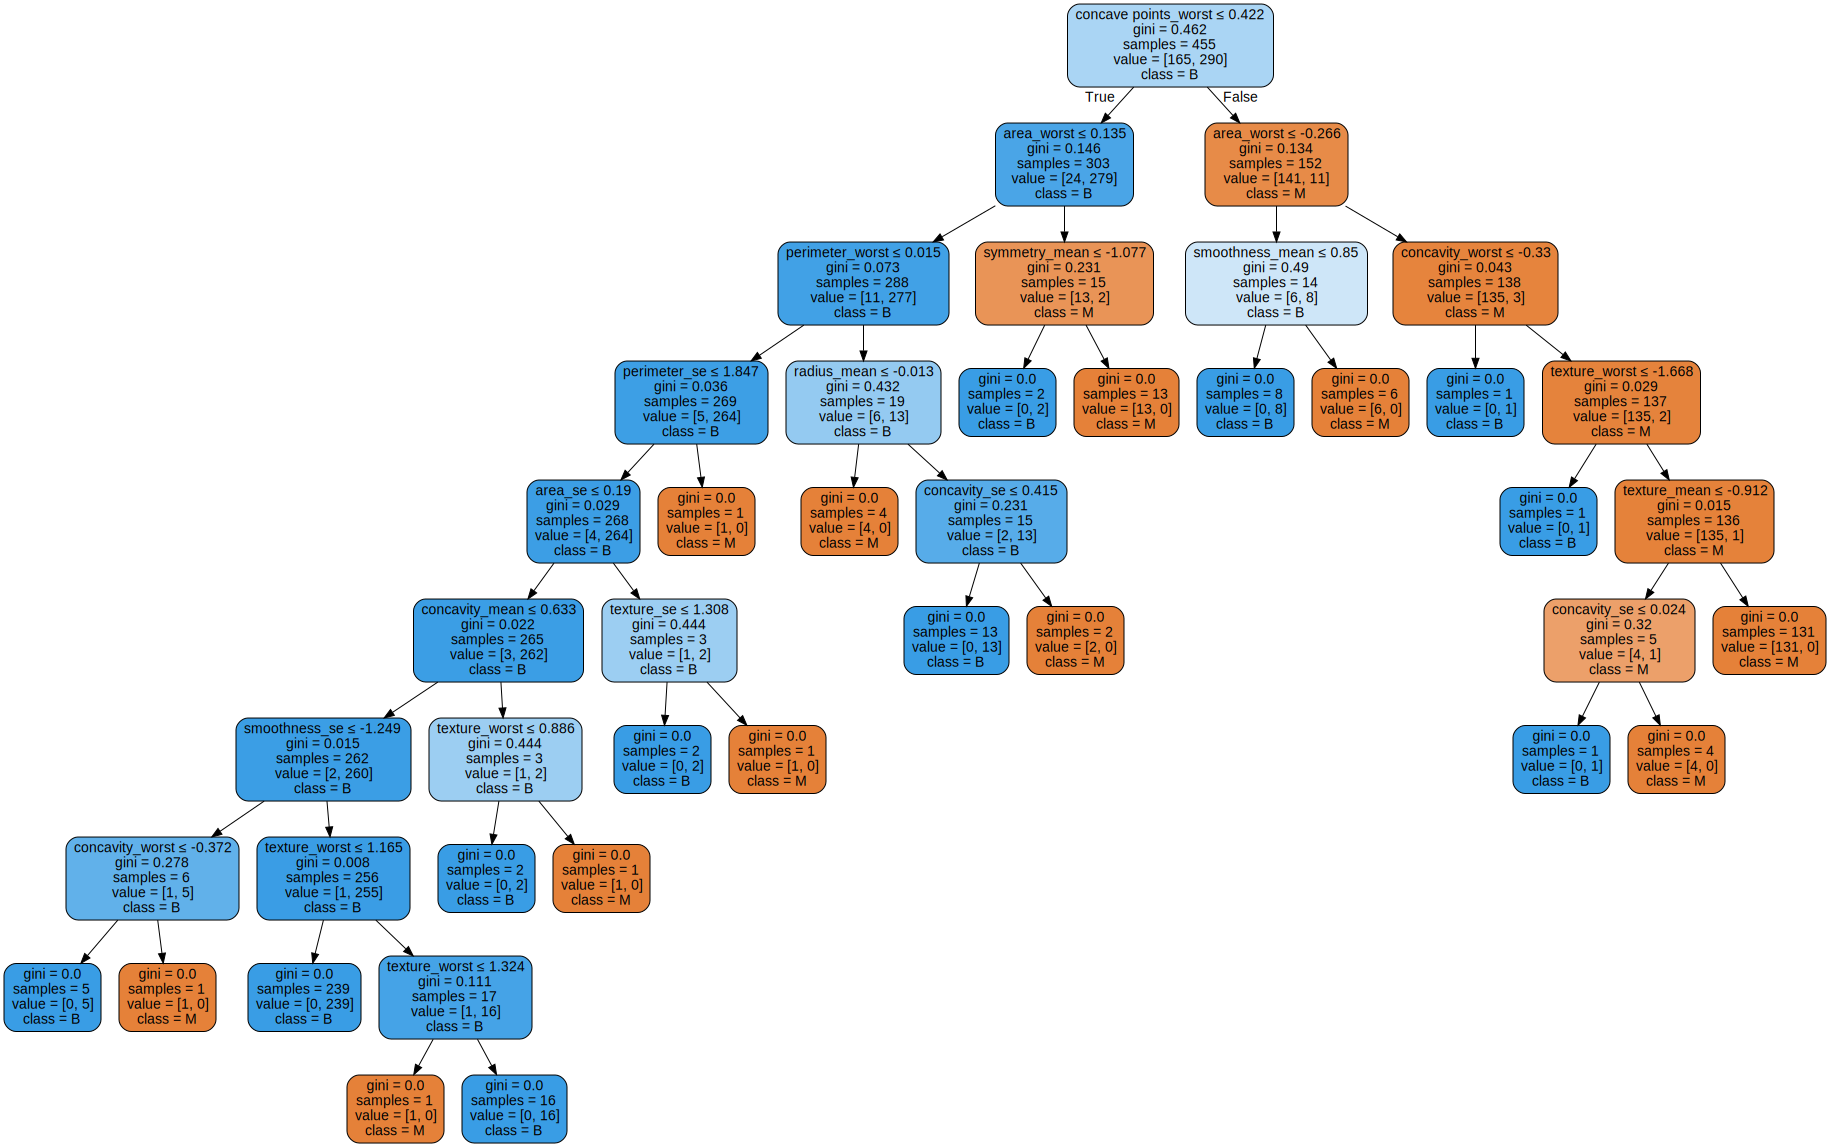

In [253]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Alfa/Desktop/graphviz-2.38/release/bin'




from sklearn import tree

#iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names_df,  
                                class_names=('M','B'),
                                filled=True, rounded=True,  
                                special_characters=True)  

import graphviz 
graph = graphviz.Source(dot_data)  

from IPython.display import display
display(graph)


The value line in each box is telling you how many samples at that node fall into each category, in order. That's why, in each box, the numbers in value add up to the number shown in sample

In [254]:
from sklearn.ensemble import RandomForestClassifier


classifier2 = RandomForestClassifier(n_estimators=200, random_state=0, criterion = "entropy")
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)

In [255]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

## Deep Learning

### Theory

Deep learning are methods from machine learning that are based on artificial neural networks. Learning can be supervised, semi-supervised or unsupervised. We used deep learning to diagnose (classify) new patients (test set) between classes: either 'B', benign cancer, or 'M', malign cancer.
<br>
<br>
Neural networks were inspired by biological neurons and the way they share and combine information. 
<br>
<img src="figures/nerves.jpg" alt="Drawing" style="width: 500px;"/>
<br>
source: https://pixabay.com/photos/nerves-network-nervous-system-line-2728138/
<br>
<br>
- Artificial Neural Networks (ANN) models

     - can be used to train a computer to perform atask (e. g. classification)
    
     - based on connected artificial neurons (e. g. perceptrons)
<br>     
<br>
- Perceptrons: we apply a function into a simple mathematical equation
    - if the value v > b, then the neuron is "activated" and the signal (output) is sent to the next neuron
<br>
<img src="figures/perceptron.png" alt="Drawing" style="width: 500px;"/>
<br>
- Multilayer perceptrons: combine their knowledge and improve on the mathematical model
    - We have the same attributes, but different bias (b) for each perceptron
<br>
<img src="figures/multilayer_perceptron.png" alt="Drawing" style="width: 500px;"/>
<br>
- Deep learning: insert multiple hidden layers into the multilayer perceptrons
    - Backpropagation: the following neurons improve on the functions from the previous neurons
<br>
<img src="figures/deep_learning_model.png" alt="Drawing" style="width: 500px;"/>
<br>

**Bibliography**

FONTAINE, Alan. Mastering Predictive Analytics with scikit-learn and TensorFlow: Implement machine learning techniques to build advanced predictive models using Python. Packt Publishing, 2018.

### Tensor Flow

Tensor Flow is a library that build models of deep neural network. To build our model, we should consider:
<br>
- architecture;
    - number of neurons in the input layer: number of attributes - 30
    - number of outputs in the output layer: number of classes - 2: 'B' and 'M'
    - number of layers: ?
    - number of neurons per hidden layers: ? 
- activation function;
    - sigmoid
    - rectified Linear Unit (ReLU)
- optimization algorithm;
    - algorithm that produces the weights of the networks
    - algorithm options: gradient descent, AdaGrad, RMSProp, Adam
- loss function;
    - produces a quantity that is minimized by the optimizer
    - options: cross entropy, square loss, hinge loss
- weight initialization strategy;
    - weights are produced by perceptrons
    - are progressively changed throughout the network to minimize the loss
    - initialization options: Xavier, He
- regularization strategy;
    - helps to reduce overfitting
    - options: L1, L2, droupout
- training strategy:
    - iterations throughout the network, based on epochs and batch size
        - iterations = epochs * [T_examples/batch]
    - epoch: one epoch is one complete round through the network
    - batch size: number of elements simultaneously shown to the training algorithm
<br>

Core concepts:
<br>
- Tensors
    - values shaped into arrays
- Computational graphs
    - series of TensorFlow operations: **ops** arranged into a graph
- Sessions
    - objects that place operations
    - CPUs, GPUs
- Variables
    - objects initialized with a value, which can be changed by the training model
- Constants
    - values that do not change


**Bibliography**

FONTAINE, Alan. Mastering Predictive Analytics with scikit-learn and TensorFlow: Implement machine learning techniques to build advanced predictive models using Python. Packt Publishing, 2018.

### Experiment with the full dataset

In this section, we classified our data using neural networks and the Tensor Flow library. We followed the following tutorial for this experiment: https://www.tensorflow.org/tutorials/structured_data/feature_columns

In [256]:
#Importing the required libraries for tensor flow
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [271]:
#Prepare the dataframe and check the format of the object

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df = df.replace(to_replace ="B", 
                 value = 0) 

df = df.replace(to_replace ="M", 
                 value = 1) 

df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

### Split the dataframe into train, validation, and test

We will now split the dataframe into train, validation, and test sets.

In [272]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

print(len(test), 'test elements', (len(test)/len(df))*100, '%')
print(len(train), 'train elements:', (len(train)/len(df))*100, '%')
print(len(val), 'validation elements', (len(val)/len(df))*100, '%')

print('')
print('Attention: data is not yet normalized!')

114 test elements 20.035149384885763 %
364 train elements: 63.971880492091394 %
91 validation elements 15.992970123022848 %

Attention: data is not yet normalized!


### Data normalization

Following the discussion of data normalization, we first separated the data in sets (train, val and test). Afterwards, we normalized the train set, store its values for mean and std, and used them for the normalization of the other two sets.

In [273]:
train_normalized = train.copy()
val_normalized = val.copy()
test_normalized = test.copy()

#Get all columns from the dataframe and exclue the columns for which we do not want to normalize
cols_n = list(train_normalized.columns)
cols_n.remove('id')
cols_n.remove('diagnosis')
#df_normalized[cols_n].head()

#Iterate over the remaining columns to normalize the data and create a z-score column
for col_n in cols_n:
    
    #Getting the mean and standard deviation of the train data
    mean = train_normalized[col_n].mean()
    std = train_normalized[col_n].std(ddof=0)
    
    #Normalizing the training data
    train_normalized[col_n] = ( train_normalized[col_n] - mean ) / std

    #Normalizing the other two sets using the calculated mean and std
    val_normalized[col_n] = ( val_normalized[col_n] - mean ) / std
    test_normalized[col_n] = ( test_normalized[col_n] - mean ) / std

### Create the input pipeline using tf.data

Next, we will wrap the dataframes with tf.data. This will enable us to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model. 

Since our data is small enough, we will load it directly into the memory.

In [274]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(df, shuffle=True, batch_size=32):
  df = df.copy()
  labels = df.pop('diagnosis')
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df))
  ds = ds.batch(batch_size)
  return ds

In [275]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train_normalized, batch_size=batch_size)
val_ds = df_to_dataset(val_normalized, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test_normalized, shuffle=False, batch_size=batch_size)

Now that we have created the input pipeline, let's call it to see the format of the data it returns. We have used a small batch size to keep the output readable.

In [276]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of radius_mean:', feature_batch['radius_mean'])
  print('A batch of targets:', label_batch )

Every feature: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
A batch of radius_mean: tf.Tensor([ 0.9688011  -0.35796815  0.2627093  -0.20991667 -0.37505102], shape=(5,), dtype=float32)
A batch of targets: tf.Tensor([1 0 1 0 0], shape=(5,), dtype=int32)


We can see that the dataset returns a dictionary of column names (from the dataframe) that map to column values from rows in the dataframe.

### Demonstrate several types of feature column

TensorFlow provides many types of feature columns. In this section, we will create several types of feature columns, and demonstrate how they transform a column from the dataframe.

In [277]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [278]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

### Numeric columns
The output of a feature column becomes the input to the model (using the demo function defined above, we will be able to see exactly how each column from the dataframe is transformed). A numeric column is the simplest type of column. It is used to represent real valued features. When using this column, your model will receive the column value from the dataframe unchanged.

In [279]:
radius_mean = feature_column.numeric_column("radius_mean")
demo(radius_mean)

[[ 1.3873312 ]
 [ 0.35951218]
 [ 1.421497  ]
 [-0.2839424 ]
 [-0.6796955 ]]


### Categorical columns
In our dataset, diagnosis is represented as a string (e.g. 'm' or 'b'). We cannot feed strings directly to a model. Instead, we must first map them to numeric values. The categorical vocabulary columns provide a way to represent strings as a one-hot vector (much like you have seen above with age buckets). The vocabulary can be passed as a list using categorical_column_with_vocabulary_list, or loaded from a file using categorical_column_with_vocabulary_file.

Since I already transformed the categorical data "diagnosis" before, I will not transform it again.

### Training the model

We will now train our model with all of the features.

In [280]:
feature_columns = []

# numeric cols
for header in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
    feature_columns.append(feature_column.numeric_column(header))

### Creating a feature layer and the objects from tensor flow
Now that we have defined our feature columns, we will use a DenseFeatures layer to input them to our dataframe model.

In [281]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

Earlier, we used a small batch size to demonstrate how feature columns worked. We will now create a new input pipeline with a larger batch size.

In [282]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

### Running the model

In [283]:
model = tf.keras.Sequential([
  feature_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.fit(train_ds, epochs=5)

Epoch 1/5
12/12 [==============================] - 1s 100ms/step - loss: 8.1960 - accuracy: 0.5165
Epoch 2/5
12/12 [==============================] - 0s 7ms/step - loss: 1.6495 - accuracy: 0.6868
Epoch 3/5
12/12 [==============================] - 0s 6ms/step - loss: 1.2776 - accuracy: 0.8049
Epoch 4/5
12/12 [==============================] - 0s 6ms/step - loss: 0.8944 - accuracy: 0.7775
Epoch 5/5
12/12 [==============================] - 0s 6ms/step - loss: 1.1365 - accuracy: 0.7967


### Checking the accuracy of the model

In [284]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

4/4 [==============================] - 0s 94ms/step - loss: 0.4050 - accuracy: 0.9211
Accuracy 0.92105263


### Discussion

As a first experimentation with deep learning, we are satisfied with the results. The accuracy we found, 92,11%, is not as good as the other two methods, Logistic Regression (96,49%) and Random Forest (97,37%), but we believe this could be due to having not yet probed with tensor flow's internal parameters, which requires a lot of time and effort.

As future work, we would further experiment with the tensor flow's different parameters and functions.

## Conclusion

As a conclusion, we can classify and diagnose cancer between Malign and Benign, when using numerical parameters. We experimented with three different machine learning methods, and saw that both Logistic Regression and Random Forest are both very accurate and can produce efficient models for breast cancer diagnosis. Our best model's accuracy is 97,37% with Random Forest.